In [2]:
import pandas as pd
import numpy as np

/opt/anaconda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
mydata = pd.read_csv('Advertising.csv')

In [4]:
mydata.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
mydata.shape

(200, 5)

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [32]:
X = mydata.loc[:, ['TV', 'radio', 'newspaper']]
Y = mydata['sales']

In [51]:
X_TEST = X[150:]
X_TRAIN = X[:150]
Y_TEST = Y[150:]g b 
Y_TRAIN = Y[:150]

In [52]:
import matplotlib.pyplot as plt

In [53]:
(mydata.loc[:, ['TV', 'radio', 'newspaper', 'sales']]).corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_TRAIN, Y_TRAIN)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
model.score(X_TEST, Y_TEST)

0.8963519785440214

In [58]:
YP = model.predict(X_TEST)

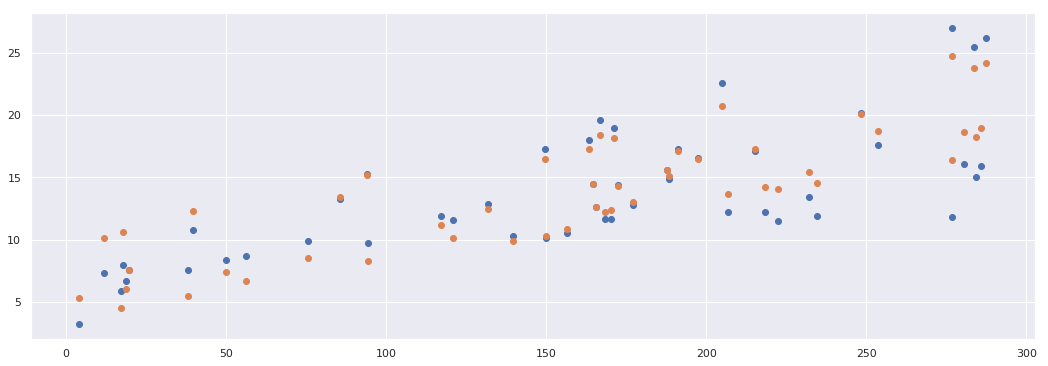

In [59]:
plt.scatter(X_TEST['TV'], Y_TEST)
plt.scatter(X_TEST['TV'], YP)

In [60]:
np.sqrt(sum((Y_TEST-YP)**2))

11.547780887217494

In [61]:
model.coef_

array([ 0.04700012,  0.17993257, -0.00140273])

In [62]:
model.intercept_

3.029766796293684

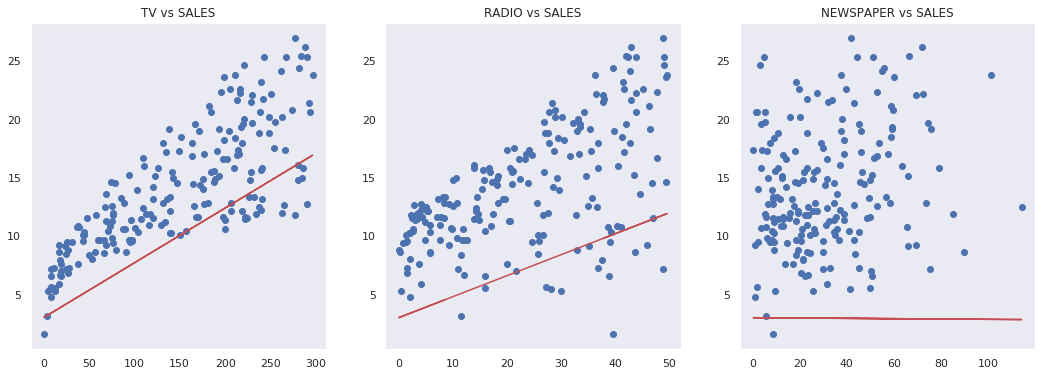

In [71]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X['TV'], Y)
xt = X['TV']
yt = model.coef_[0] * xt + model.intercept_
plt.plot(xt, yt, 'r')
plt.title('TV vs SALES')
plt.grid()

plt.subplot(1, 3, 2)
plt.scatter(X['radio'], Y)
xt = X['radio']
yt = model.coef_[1] * xt + model.intercept_
plt.plot(xt, yt, 'r')
plt.title('RADIO vs SALES')
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(X['newspaper'], Y)
xt = X['newspaper']
yt = model.coef_[2] * xt + model.intercept_
plt.plot(xt, yt, 'r')
plt.title('NEWSPAPER vs SALES')
plt.grid()

plt.show()

In [64]:
import seaborn as sns

In [65]:
mydata_ = X
mydata_['Y'] = Y

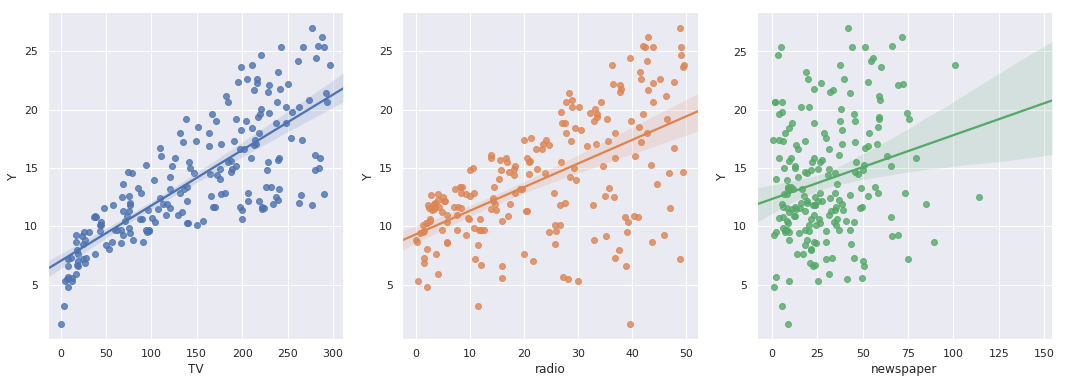

In [66]:
f, axes = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(18, 6)})
sns.regplot(x='TV', y='Y', data=mydata_, ax=axes[0])
sns.regplot(x='radio', y='Y', data=mydata_, ax=axes[1])
sns.regplot(x='newspaper', y='Y', data=mydata_, ax=axes[2])
sns.despine()

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
X = mydata.loc[:, ['TV', 'radio', 'newspaper']]
Y = mydata['sales']
YP = model.predict(X)

In [69]:
error = mean_squared_error(YP, Y)

In [70]:
np.sqrt(error)

1.6776489795179206